# Analysis - exp63 and exp73

- Random player analysis for the best DQNs
- All trained/tested on 15x15 board 

In [11]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, model, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"eval_{model}_random_{int(r)}_monitor.csv")
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

## Learning data

In [12]:
mlp_hot = ["DQN_hot1", 
          "DQN_hot2", 
          "DQN_hot3", 
          "DQN_hot4", 
          "DQN_hot5"]       
mlp_hot_names = ["hot1", 
              "hot2", 
              "hot3", 
              "hot4", 
              "hot5"]

conv_hot = ["DQN_conv2", "DQN_conv3"]
conv_hot_names = ["conv1", "conv2"]
           
mlp_xy = ["DQN_xy1", 
          "DQN_xy2", 
          "DQN_xy3", 
          "DQN_xy4", 
          "DQN_xy5",  
          "DQN_optuna"]
mlp_xy_names = ["xy1", 
              "xy2", 
              "xy3", 
              "xy4", 
              "xy5",  
              "optuna (best)"]



# It all gets loaded the same place 
data = {}

# Exp 63
path = "/Users/qualia/Code/azad/data/wythoff/exp63/"
for model in mlp_hot + conv_hot:
    data[model] = load_data(path, model, run_index=(2, 21))
    
# Exp 73
path = "/Users/qualia/Code/azad/data/wythoff/exp73/"
for model in mlp_xy:
    data[model] = load_data(path, model, run_index=(2, 21))

In [15]:
pprint(data.keys())
pprint(data[mlp_xy[0]][0].keys())

dict_keys(['DQN_hot1', 'DQN_hot2', 'DQN_hot3', 'DQN_hot4', 'DQN_hot5', 'DQN_conv2', 'DQN_conv3', 'DQN_xy1', 'DQN_xy2', 'DQN_xy3', 'DQN_xy4', 'DQN_xy5', 'DQN_optuna'])
dict_keys(['file', 'episode', 'score', 'total_reward'])


## Player wins

Look at the natural variations

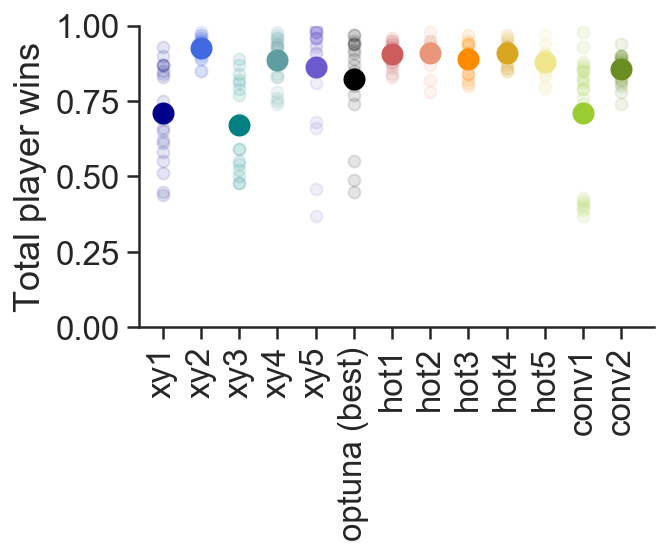

In [28]:
model_names = mlp_xy + mlp_hot + conv_hot
model_better = mlp_xy_names + mlp_hot_names + conv_hot_names

colors_xy = [ "darkblue", "royalblue", "teal", "cadetblue", "slateblue", "black"]
colors_hot = colors = [ "indianred", "darksalmon", "darkorange", "goldenrod", "khaki"]
colors_conv = ["yellowgreen", "olivedrab", "olive"]
colors = colors_xy + colors_hot + colors_conv

key = 'total_reward'
plt.figure(figsize=(5, 3))
for i, (model, better, color) in enumerate(zip(model_names, model_better, colors)):
    ys = []
    for r, mon in enumerate(data[model]):
        y = mon[key][-1]/100
        ys.append(y)
        _ = plt.scatter(better, y, color=color, alpha=0.1)
    _ = plt.scatter(better, np.mean(ys), color=color, s=100)
_ = plt.ylim(0, 1)
_ = plt.ylabel(f"Total player wins")
_ = plt.tight_layout()
_ = plt.xlabel("")
_ = plt.xticks(rotation=90)
_ = sns.despine()